Importing necessary libraries for EDA

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("ggplot")
import seaborn as sns
import plotly.express as px 
%matplotlib inline

Importing necessary libraries for Language Processing

In [57]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter 

Importing necessary libraries for ML

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# EDA

In [59]:
column_names = ["Label", "Email Text"]

df = pd.read_csv("C:\\Users\\Dell\\Downloads\\SMSSpamCollection.txt", delimiter="\t", header=None, names=column_names)

In [60]:
df.head()

,Label,Email Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label       5572 non-null   object
 1   Email Text  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [62]:
df.describe().transpose()

,count,unique,top,freq
Label,5572,2,ham,4825
Email Text,5572,5169,"Sorry, I'll call later",30


In [63]:
df.drop_duplicates(inplace=True)

In [64]:
fig = px.histogram(df, x="Label", color="Label", title="Email Authenticity Distribution")
fig

In [65]:
n = int(input("Enter the number of emails you wanna see: "))

for i in range(n):
    print(f"Email: {i+1}")
    print(f"Label: {df['Label'].iloc[i]} \n")
    print(f"{df['Email Text'].iloc[i]} \n")

Enter the number of emails you wanna see: 5
Email: 1
Label: ham 

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

Email: 2
Label: ham 

Ok lar... Joking wif u oni... 

Email: 3
Label: spam 

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

Email: 4
Label: ham 

U dun say so early hor... U c already then say... 

Email: 5
Label: ham 

Nah I don't think he goes to usf, he lives around here though 



In [66]:
def no_of_words(text):
    words = text.split(" ")
    word_count = len(words)
    return word_count

In [67]:
df["Word Count"] = df["Email Text"].apply(no_of_words)

In [68]:
df.head()

,Label,Email Text,Word Count
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


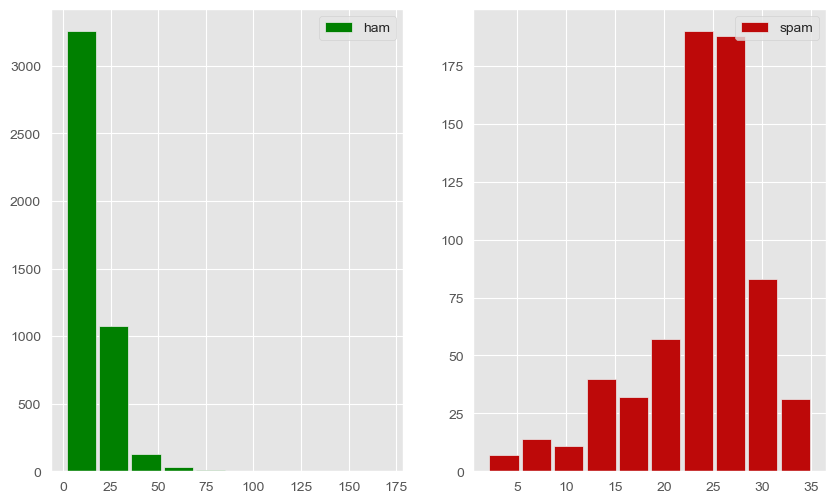

In [69]:
custom_red = "#BD0909"

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].hist(df[df["Label"] == "ham"]["Word Count"], label="ham", color="green", rwidth=0.9)
ax[0].legend(loc="upper right")
ax[1].hist(df[df["Label"] == "spam"]["Word Count"], label="spam", color=custom_red, rwidth=0.9)
ax[1].legend(loc="upper right")


# Language Processing

In [70]:
stop_words = set(stopwords.words("english"))

def text_processing(text):
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [71]:
df["Email Text"] = df["Email Text"].apply(text_processing)

In [72]:
df.head()

,Label,Email Text,Word Count
0,ham,Go jurong point crazy Available bugis n great ...,20
1,ham,Ok lar Joking wif u oni,6
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,28
3,ham,U dun say early hor U c already say,11
4,ham,Nah I dont think goes usf lives around though,13


In [81]:
stemmer = PorterStemmer()

def text_stemmer(text):
    data = [stemmer.stem(word) for word in text]
    return "".join(data)

In [82]:
df["Email Text"] = df["Email Text"].apply(lambda x: text_stemmer(x))

In [83]:
df.head()

,Label,Email Text,Word Count
0,ham,go jurong point crazy available bugis n great ...,20
1,ham,ok lar joking wif u oni,6
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,28
3,ham,u dun say early hor u c already say,11
4,ham,nah i dont think goes usf lives around though,13


In [84]:
df["Label"] = df["Label"].replace({"spam" : 0, "ham" : 1})

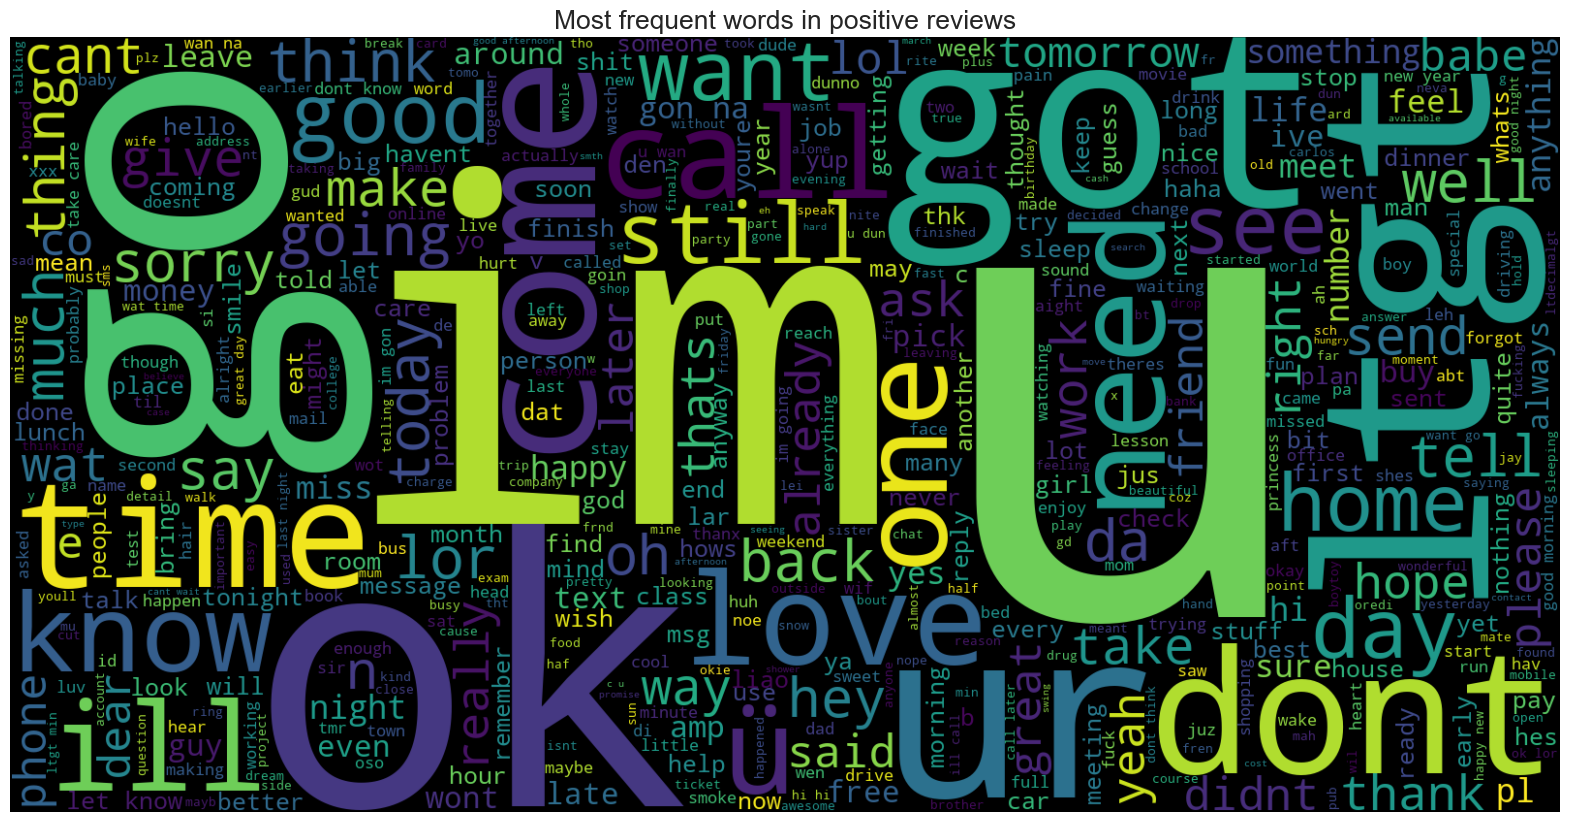

In [86]:
ham_emails = df[df["Label"] == 1]

text1 = ' '.join([word for word in ham_emails['Email Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [87]:
count1 = Counter()

for text in ham_emails["Email Text"].values:
    for word in text.split(" "):
        count1[word] += 1
        
count1.most_common(15)

[('i', 1363),
 ('u', 891),
 ('im', 445),
 ('get', 295),
 ('2', 292),
 ('dont', 259),
 ('ltgt', 254),
 ('ok', 247),
 ('go', 242),
 ('got', 238),
 ('like', 221),
 ('know', 221),
 ('ill', 211),
 ('come', 211),
 ('good', 207)]

In [88]:
pos_words = pd.DataFrame(count1.most_common(15))
pos_words.columns = ["word", "count"]
pos_words

,word,count
0,i,1363
1,u,891
2,im,445
3,get,295
4,2,292
5,dont,259
6,ltgt,254
7,ok,247
8,go,242
9,got,238


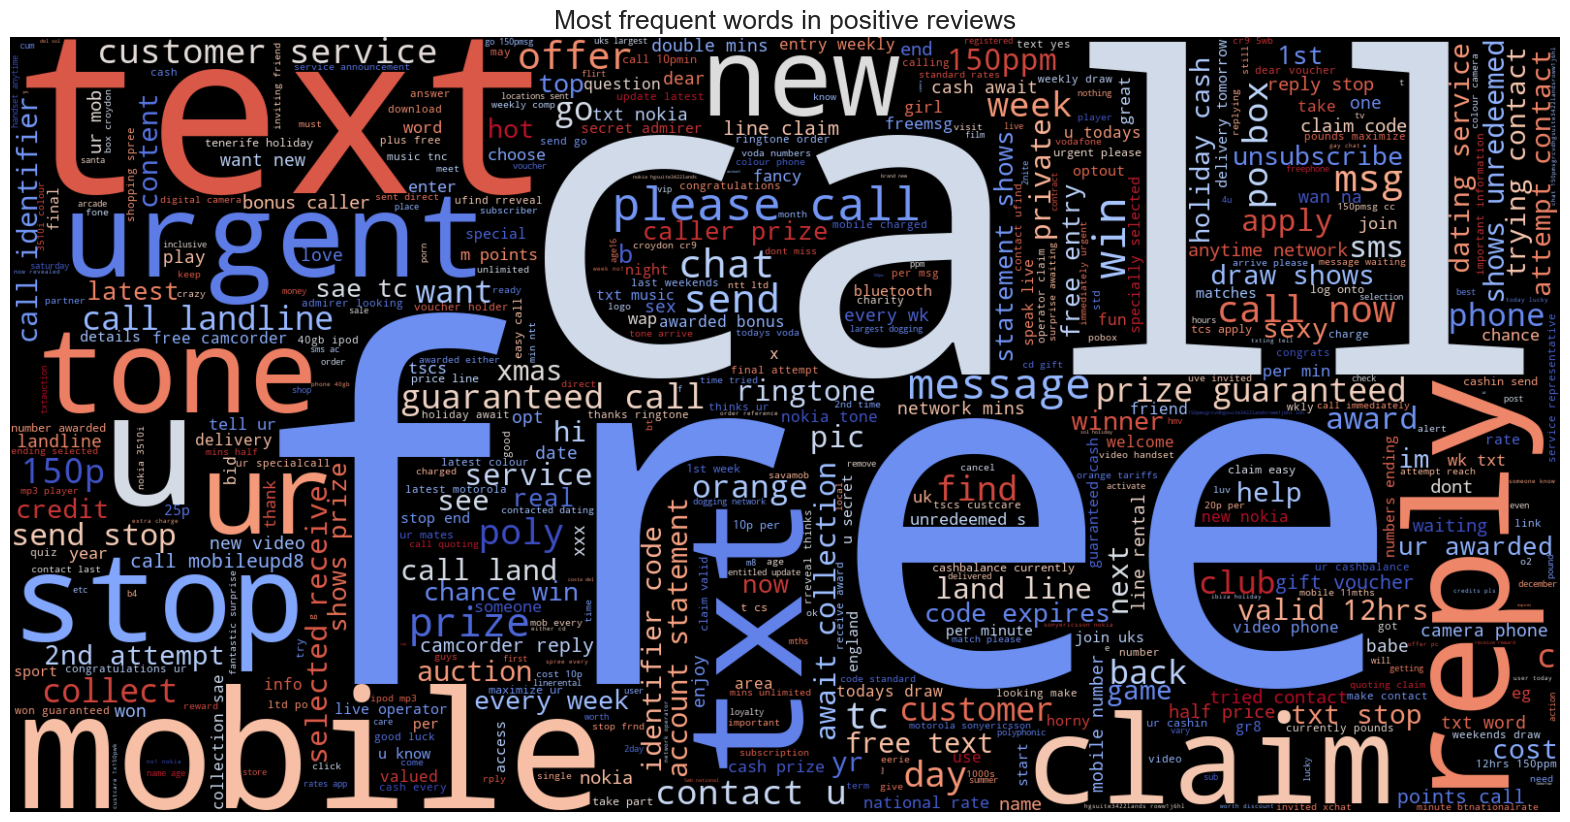

In [93]:
spam_emails = df[df["Label"] == 0]

text1 = ' '.join([word for word in spam_emails['Email Text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800, colormap="coolwarm").generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [94]:
count2 = Counter()

for text in spam_emails["Email Text"].values:
    for word in text.split(" "):
        count2[word] += 1
        
count2.most_common(15)

[('call', 303),
 ('free', 188),
 ('2', 155),
 ('txt', 126),
 ('u', 123),
 ('ur', 119),
 ('mobile', 105),
 ('stop', 105),
 ('text', 103),
 ('4', 97),
 ('claim', 96),
 ('reply', 93),
 ('you', 89),
 ('prize', 81),
 ('your', 70)]

In [95]:
neg_words = pd.DataFrame(count2.most_common(15))
neg_words.columns = ["word", "count"]
neg_words

,word,count
0,call,303
1,free,188
2,2,155
3,txt,126
4,u,123
5,ur,119
6,mobile,105
7,stop,105
8,text,103
9,4,97


In [96]:
X = df["Email Text"]
Y = df["Label"].values


vect = TfidfVectorizer()
X = vect.fit_transform(df["Email Text"])

# Applying ML Algorithms on the Data

Feature Engineering

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=101)

Logistic Regression Modeling

In [98]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
LR_predictions = log_reg.predict(X_test)

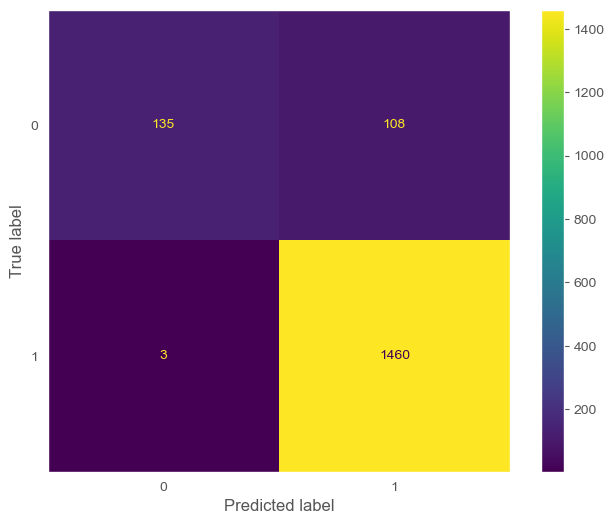

In [99]:
log_reg_conf_mat = confusion_matrix(y_test, LR_predictions, labels=log_reg.classes_)
conf_disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_conf_mat, display_labels=log_reg.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
conf_disp.plot(ax=ax)
ax.grid(False)

In [100]:
log_reg_class_rep = classification_report(y_test, LR_predictions)
print(log_reg_class_rep)

              precision    recall  f1-score   support

           0       0.98      0.56      0.71       243
           1       0.93      1.00      0.96      1463

    accuracy                           0.93      1706
   macro avg       0.95      0.78      0.84      1706
weighted avg       0.94      0.93      0.93      1706



Multi-nomial Naive Bayes Modeling

In [101]:
MNB = MultinomialNB()

MNB.fit(X_train, y_train)
MNB_predictions = MNB.predict(X_test)

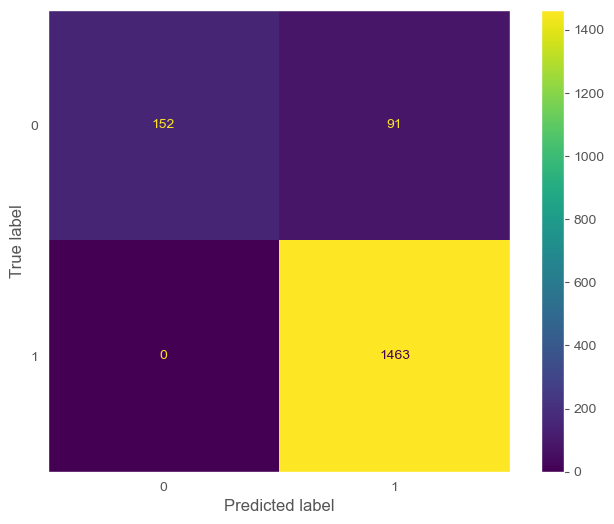

In [102]:
MNB_conf_mat = confusion_matrix(y_test, MNB_predictions, labels=MNB.classes_)
conf_disp2 = ConfusionMatrixDisplay(confusion_matrix=MNB_conf_mat, display_labels=MNB.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
conf_disp2.plot(ax=ax)
ax.grid(False)

In [103]:
MNB_class_rep = classification_report(y_test, MNB_predictions)
print(MNB_class_rep)

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       243
           1       0.94      1.00      0.97      1463

    accuracy                           0.95      1706
   macro avg       0.97      0.81      0.87      1706
weighted avg       0.95      0.95      0.94      1706

